# Data Visualization on telegram chat history 

Want to find out random information like the average response time of your girlfriend or who sends more messages?
You can do so by: 
1. Export your telegram private chat history (no group chats) as a .json file
2. Name it result.json
3. Place it in the same folder as this code and click Run All! (can use VScode or Colab)

In [1]:
from collections import Counter
import json

with open("result.json", encoding="utf-8") as f:
    data = json.load(f)

messages = data["messages"]
sender_counts = Counter(msg["from"] for msg in messages if "from" in msg)

print(sender_counts)


Counter({'Hikaru Kawaguchi': 24020, 'odelia': 20266})


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(messages)

In [4]:
df.head()

,id,type,date,date_unixtime,from,from_id,forwarded_from,text,text_entities,reply_to_message_id,...,edited,edited_unixtime,reactions,duration_seconds,actor,actor_id,action,discard_reason,message_id,contact_information
0,335596,message,2024-06-03T14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,"[{'type': 'link', 'text': 'https://www.ndtv.co...","[{'type': 'link', 'text': 'https://www.ndtv.co...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335597,message,2024-06-03T14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,Oh no don't let Singapore see!,"[{'type': 'plain', 'text': 'Oh no don't let Si...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335598,message,2024-06-03T14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,"Can you imagine the ""societal concerns over fa...","[{'type': 'plain', 'text': 'Can you imagine th...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335599,message,2024-06-03T14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,The horror,"[{'type': 'plain', 'text': 'The horror'}]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335600,message,2024-06-03T14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,"seriously tho, good on the Indian SC","[{'type': 'plain', 'text': 'seriously tho, goo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


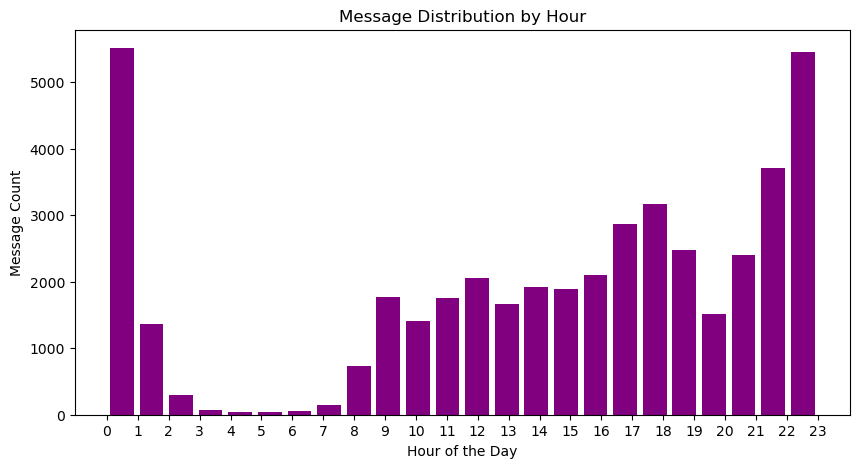

In [5]:
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["date"].dt.hour

plt.figure(figsize=(10, 5))
df["hour"].plot(kind="hist", bins=24, rwidth=0.8, color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Message Count")
plt.title("Message Distribution by Hour")
plt.xticks(range(24))
plt.show()

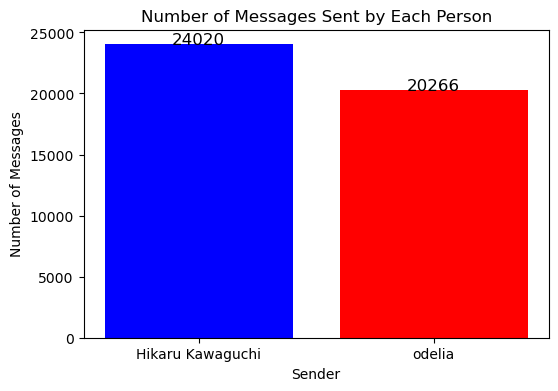

In [6]:
df['date'] = pd.to_datetime(df['date'])


message_counts = df['from'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(message_counts.index, message_counts.values, color=['blue', 'red'])


plt.xlabel("Sender")
plt.ylabel("Number of Messages")
plt.title("Number of Messages Sent by Each Person")

for i, count in enumerate(message_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', fontsize=12)

plt.show()

In [7]:
df2 = df.shift(1)
df2.iloc[0] = df.iloc[0]
df2 = df2.rename(columns= lambda x: x + '_new')
df2.head()

,id_new,type_new,date_new,date_unixtime_new,from_new,from_id_new,forwarded_from_new,text_new,text_entities_new,reply_to_message_id_new,...,edited_unixtime_new,reactions_new,duration_seconds_new,actor_new,actor_id_new,action_new,discard_reason_new,message_id_new,contact_information_new,hour_new
0,335596.0,message,2024-06-03 14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,"[{'type': 'link', 'text': 'https://www.ndtv.co...","[{'type': 'link', 'text': 'https://www.ndtv.co...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,335596.0,message,2024-06-03 14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,"[{'type': 'link', 'text': 'https://www.ndtv.co...","[{'type': 'link', 'text': 'https://www.ndtv.co...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
2,335597.0,message,2024-06-03 14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,Oh no don't let Singapore see!,"[{'type': 'plain', 'text': 'Oh no don't let Si...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
3,335598.0,message,2024-06-03 14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,"Can you imagine the ""societal concerns over fa...","[{'type': 'plain', 'text': 'Can you imagine th...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,335599.0,message,2024-06-03 14:22:27,1717395747,odelia,user328658334,Shikhar Gupta,The horror,"[{'type': 'plain', 'text': 'The horror'}]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0


/var/folders/02/w65dv9md5fdcdn63tvst4ssc0000gn/T/ipykernel_65519/1529503061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respond['response_time'] = (respond['date'] - respond['date_new']).dt.total_seconds()/60


<Axes: title={'center': 'Average Response Time by Sender'}, xlabel='from'>

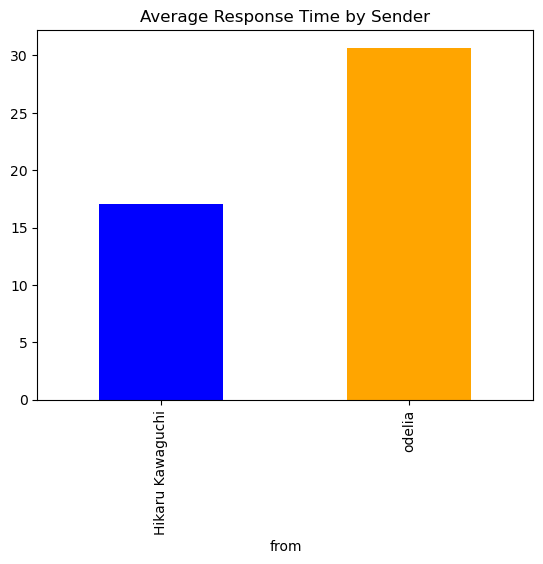

In [8]:
pd.set_option('display.max_columns', None)
merged_df = pd.concat([df, df2], axis=1)
respond = merged_df[merged_df['from'] != merged_df['from_new']]
respond['response_time'] = (respond['date'] - respond['date_new']).dt.total_seconds()/60
respond.groupby('from')['response_time'].mean().plot(kind='bar', title='Average Response Time by Sender',
                                                     color=['blue','orange'])

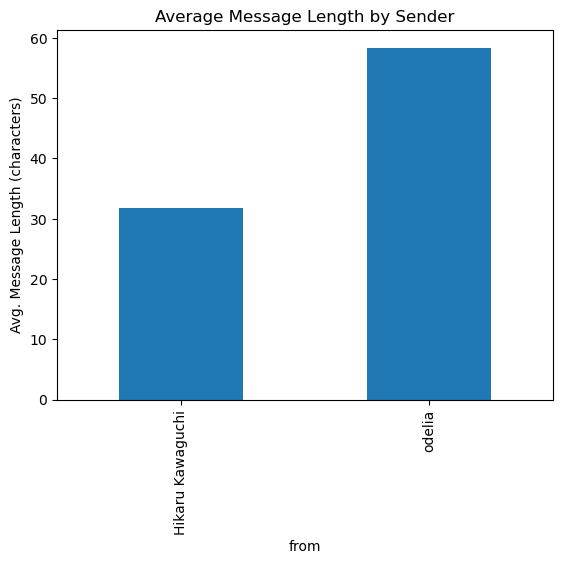

In [9]:
df['message_length'] = df['text'].astype(str).apply(len)
df.groupby('from')['message_length'].mean().plot(kind='bar', title="Average Message Length by Sender")
plt.ylabel("Avg. Message Length (characters)")
plt.show()